In [198]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [180]:
#import all the datasets

Summary_Dataset = pd.read_csv("Zentel Network Service Ticket Data.csv",index_col= False)
Service_type = pd.read_csv("Service Type.csv", index_col= False)
Fault_type = pd.read_csv("Fault Type.csv", index_col= False)
Employees = pd.read_csv("Employees.csv", index_col= False)
Channel_Type = pd.read_csv("Channel Type.csv", index_col= False)
Location = pd.read_csv("Location.csv", index_col= False)

In [181]:
#in the summary dataset, create a service type column by extracting the data from the report id column
service_type=[]
for item in Summary_Dataset['Report ID']:
    service_type.append(item.split('-')[-1])
    
Summary_Dataset['Service Type']= service_type

In [182]:
#merge all the datasets

Merged_data1 = Summary_Dataset.merge(Service_type, how= 'left', left_on='Service Type', right_on= 'Service Code')
Merged_data2 = Merged_data1.merge(Employees, how= 'left',  left_on= 'Operator', right_on= 'Employee_name')
Merged_data3 = Merged_data2.merge(Channel_Type, how='left', left_on = 'Report Channel', right_on= 'Channel Key')
final_merge = Merged_data3.merge(Location, how= 'left', left_on= 'State Key', right_on= 'State Key')

final_merge

,Report ID,Report Channel,Customer Name,State Key,Ticket Open Time,Ticket Resp Time,Issue Res Time,Fault Type,Operator,Ticket Close Time,...,Empoyee_ID,Manager ID,Employee_name,Designation,Manager,Channel Key,Channel,Zone,Zone Desc,State
0,AXA-20201231-1101-WLESS,CH01,Access,NGS001,2020/12/31 17:07:04,2020/12/31 17:10:20,2020/12/31 20:44:42,NaN,Tunde,,...,202,101.0,Tunde,Operator,Victor,CH01,Social Media,SS,South-South,ANAMBRA
1,AXA-20201230-1102-WLESS,CH01,Access,NGS001,2020/12/30 19:04:06,2020/12/30 19:13:18,2020/12/30 19:46:30,Customers End,Sekina,2021/01/01 13:27:17,...,203,101.0,Sekina,Operator,Victor,CH01,Social Media,SS,South-South,ANAMBRA
2,AXA-20201229-1103-WLESS,CH01,Access,NGS001,2020/12/29 18:28:04,2020/12/29 18:37:52,2020/12/29 20:10:11,Customers End,Sherifat,2020/12/30 13:20:43,...,205,101.0,Sherifat,Operator,Victor,CH01,Social Media,SS,South-South,ANAMBRA
3,AXA-20201229-1104-HSE,CH01,Arik,NGS002,2020/12/29 14:49:16,2020/12/29 14:58:23,2020/12/29 16:03:56,Line damage,Kingsley,2020/12/29 21:34:31,...,212,102.0,Kingsley,Operator,Kerry,CH01,Social Media,SW,South-West,OYO
4,AXA-20201231-1105-HSE,CH01,Arik,NGS003,2020/12/31 21:43:03,2020/12/31 21:47:39,2020/12/31 22:20:58,Customers End,Kola,2021/01/02 06:54:01,...,216,103.0,Kola,Operator,Wale,CH01,Social Media,SW,South-West,LAGOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,AXA-20201204-7094-WiFi5,CH06,Lemway,NGS003,2020/12/04 9:10:37,2020/12/04 09:10:37,2020/12/04 09:10:37,Line damage,Sheg,2020/12/04 12:53:30,...,228,104.0,Sheg,Operator,Seun,CH06,Email,SW,South-West,LAGOS
5994,AXA-20201226-7095-WLESS,CH05,BetSan,NGS004,2020/12/26 11:24:17,2020/12/26 11:24:17,2020/12/26 11:24:17,Customers End,Brenda,2020/12/26 16:58:54,...,213,102.0,Brenda,Operator,Kerry,CH05,USSD,SS,South-South,DELTA
5995,AXA-20201210-7096-WiFi6,CH06,ValueNaija,NGS029,2020/12/10 12:01:54,2020/12/10 12:01:54,2020/12/10 12:01:54,Customers End,Sola,2020/12/10 16:17:37,...,218,103.0,Sola,Operator,Wale,CH06,Email,SW,South-West,EKITI
5996,AXA-20201208-7097-WLESS,CH03,Sahad,NGS007,2020/12/08 9:01:41,2020/12/08 09:01:41,2020/12/08 09:01:41,Line damage,Jonathan,2020/12/08 13:39:55,...,209,102.0,Jonathan,Operator,Kerry,CH03,WebForm,NE,North-East,BORNO


# Data Wrangling and Data cleaning

In [183]:
#remove the columns that won't be necessary for our analysis from the merged dataset

columns_to_drop = ['Report ID','Report Channel', 'Customer Name', 'State Key', 'Service Type', 'Service Code', 'Empoyee_ID', 'Manager ID', 'Employee_name',
                  'Designation', 'Channel Key', 'Zone Desc', 'Ticket Status', 'Business Status']

structured_data = final_merge.drop(columns=columns_to_drop)

structured_data

,Ticket Open Time,Ticket Resp Time,Issue Res Time,Fault Type,Operator,Ticket Close Time,Service Name,Manager,Channel,Zone,State
0,2020/12/31 17:07:04,2020/12/31 17:10:20,2020/12/31 20:44:42,NaN,Tunde,,Wireless,Victor,Social Media,SS,ANAMBRA
1,2020/12/30 19:04:06,2020/12/30 19:13:18,2020/12/30 19:46:30,Customers End,Sekina,2021/01/01 13:27:17,Wireless,Victor,Social Media,SS,ANAMBRA
2,2020/12/29 18:28:04,2020/12/29 18:37:52,2020/12/29 20:10:11,Customers End,Sherifat,2020/12/30 13:20:43,Wireless,Victor,Social Media,SS,ANAMBRA
3,2020/12/29 14:49:16,2020/12/29 14:58:23,2020/12/29 16:03:56,Line damage,Kingsley,2020/12/29 21:34:31,High speed Internet,Kerry,Social Media,SW,OYO
4,2020/12/31 21:43:03,2020/12/31 21:47:39,2020/12/31 22:20:58,Customers End,Kola,2021/01/02 06:54:01,High speed Internet,Wale,Social Media,SW,LAGOS
...,...,...,...,...,...,...,...,...,...,...,...
5993,2020/12/04 9:10:37,2020/12/04 09:10:37,2020/12/04 09:10:37,Line damage,Sheg,2020/12/04 12:53:30,WiFI - 5,Seun,Email,SW,LAGOS
5994,2020/12/26 11:24:17,2020/12/26 11:24:17,2020/12/26 11:24:17,Customers End,Brenda,2020/12/26 16:58:54,Wireless,Kerry,USSD,SS,DELTA
5995,2020/12/10 12:01:54,2020/12/10 12:01:54,2020/12/10 12:01:54,Customers End,Sola,2020/12/10 16:17:37,WiFI - 6,Wale,Email,SW,EKITI
5996,2020/12/08 9:01:41,2020/12/08 09:01:41,2020/12/08 09:01:41,Line damage,Jonathan,2020/12/08 13:39:55,Wireless,Kerry,WebForm,NE,BORNO


In [184]:
structured_data.shape

(5998, 11)

In [185]:
structured_data.describe()

,Ticket Open Time,Ticket Resp Time,Issue Res Time,Fault Type,Operator,Ticket Close Time,Service Name,Manager,Channel,Zone,State
count,5998,5998,5998,5472,5998,5998,5998,5998,5998,5998,5998
unique,5986,5978,5983,9,28,5347,19,4,6,6,37
top,2020/12/31 17:04:04,2020/12/16 13:54:39,2020/12/20 13:33:27,Customers End,Bola,,Wireless,Victor,Social Media,SS,DELTA
freq,2,2,2,3151,426,639,1134,2780,1704,1323,432


In [186]:
#clean the structured data

In [187]:
#check for the null values
structured_data.isnull().sum()

Ticket Open Time       0
Ticket Resp Time       0
Issue Res Time         0
Fault Type           526
Operator               0
Ticket Close Time      0
Service Name           0
Manager                0
Channel                0
Zone                   0
State                  0
dtype: int64

In [188]:
#for the null values in the faulty type column, change their values to 'unknown'

structured_data['Fault Type'].replace(np.nan, 'Unknown', inplace=True)

structured_data

,Ticket Open Time,Ticket Resp Time,Issue Res Time,Fault Type,Operator,Ticket Close Time,Service Name,Manager,Channel,Zone,State
0,2020/12/31 17:07:04,2020/12/31 17:10:20,2020/12/31 20:44:42,Unknown,Tunde,,Wireless,Victor,Social Media,SS,ANAMBRA
1,2020/12/30 19:04:06,2020/12/30 19:13:18,2020/12/30 19:46:30,Customers End,Sekina,2021/01/01 13:27:17,Wireless,Victor,Social Media,SS,ANAMBRA
2,2020/12/29 18:28:04,2020/12/29 18:37:52,2020/12/29 20:10:11,Customers End,Sherifat,2020/12/30 13:20:43,Wireless,Victor,Social Media,SS,ANAMBRA
3,2020/12/29 14:49:16,2020/12/29 14:58:23,2020/12/29 16:03:56,Line damage,Kingsley,2020/12/29 21:34:31,High speed Internet,Kerry,Social Media,SW,OYO
4,2020/12/31 21:43:03,2020/12/31 21:47:39,2020/12/31 22:20:58,Customers End,Kola,2021/01/02 06:54:01,High speed Internet,Wale,Social Media,SW,LAGOS
...,...,...,...,...,...,...,...,...,...,...,...
5993,2020/12/04 9:10:37,2020/12/04 09:10:37,2020/12/04 09:10:37,Line damage,Sheg,2020/12/04 12:53:30,WiFI - 5,Seun,Email,SW,LAGOS
5994,2020/12/26 11:24:17,2020/12/26 11:24:17,2020/12/26 11:24:17,Customers End,Brenda,2020/12/26 16:58:54,Wireless,Kerry,USSD,SS,DELTA
5995,2020/12/10 12:01:54,2020/12/10 12:01:54,2020/12/10 12:01:54,Customers End,Sola,2020/12/10 16:17:37,WiFI - 6,Wale,Email,SW,EKITI
5996,2020/12/08 9:01:41,2020/12/08 09:01:41,2020/12/08 09:01:41,Line damage,Jonathan,2020/12/08 13:39:55,Wireless,Kerry,WebForm,NE,BORNO


In [318]:
#add columns for response time difference , response hours, resolution time, Resolution hour, Resolution Class and within or outside 6pm-9pm

#reponse time difference is the difference between the ticket response time and the ticket open time
structured_data['Response time diff'] = pd.to_datetime(structured_data['Ticket Resp Time']) - pd.to_datetime(structured_data['Ticket Open Time'])

#resolution time differnce is the difference between the issue response time and the issue response time
structured_data['Resolution time diff'] = pd.to_datetime(structured_data['Issue Res Time']) - pd.to_datetime(structured_data['Ticket Resp Time'])

#response time difference in seconds 
structured_data['Response time diff secs']= structured_data['Response time diff'].dt.total_seconds()

#resolution time difference in seconds
structured_data['Resolution time diff secs']= structured_data['Resolution time diff'].dt.total_seconds()

#report hour is the start hour of the day of the ticket was issued
structured_data['Report Hour']= np.int64(pd.to_datetime(structured_data['Ticket Open Time']).dt.hour)

#resolution class is a representation of the resolution matrix
structured_data['Resolution Class']=np.where(structured_data['Resolution time diff']<='00:30:00', 'Excellent',
                                             np.where((structured_data['Resolution time diff']>'00:30:00') & (structured_data['Resolution time diff'] <='01:00:00'), 'Good',
                                            np.where((structured_data['Resolution time diff']>'01:00:00')& (structured_data['Resolution time diff']<='03:00:00'),'Fair','Critical')))

#Within or Outside 6-pm shows tickets that were opened between 6-9pm or otherwise
structured_data['Within or Outside 6pm-9pm'] = np.where((structured_data['Report Hour']>18) & (structured_data['Report Hour'] <=21), 'Within 6pm-9pm', 'Outside 6pm-9pm')

#Response time status are ticket reponse times that are deemed good or bad
structured_data['Response_time_status'] = np.where(structured_data['Response time diff secs']<=15, 'Good', 'Bad')

In [319]:
#load the clean dataset

structured_data

,Ticket Open Time,Ticket Resp Time,Issue Res Time,Fault Type,Operator,Ticket Close Time,Service Name,Manager,Channel,Zone,State,Response time diff,Resolution time diff,Response time diff secs,Resolution Hour,Resolution Class,Within or Outside 6pm-9pm,Resolution time diff secs,Response_time_status,Report Hour
0,2020/12/31 17:07:04,2020/12/31 17:10:20,2020/12/31 20:44:42,Unknown,Tunde,,Wireless,Victor,Social Media,SS,ANAMBRA,0 days 00:03:16,0 days 03:34:22,196.0,17,Critical,Outside 6pm-9pm,12862.0,Bad,17
1,2020/12/30 19:04:06,2020/12/30 19:13:18,2020/12/30 19:46:30,Customers End,Sekina,2021/01/01 13:27:17,Wireless,Victor,Social Media,SS,ANAMBRA,0 days 00:09:12,0 days 00:33:12,552.0,19,Good,Within 6pm-9pm,1992.0,Bad,19
2,2020/12/29 18:28:04,2020/12/29 18:37:52,2020/12/29 20:10:11,Customers End,Sherifat,2020/12/30 13:20:43,Wireless,Victor,Social Media,SS,ANAMBRA,0 days 00:09:48,0 days 01:32:19,588.0,18,Fair,Outside 6pm-9pm,5539.0,Bad,18
3,2020/12/29 14:49:16,2020/12/29 14:58:23,2020/12/29 16:03:56,Line damage,Kingsley,2020/12/29 21:34:31,High speed Internet,Kerry,Social Media,SW,OYO,0 days 00:09:07,0 days 01:05:33,547.0,14,Fair,Outside 6pm-9pm,3933.0,Bad,14
4,2020/12/31 21:43:03,2020/12/31 21:47:39,2020/12/31 22:20:58,Customers End,Kola,2021/01/02 06:54:01,High speed Internet,Wale,Social Media,SW,LAGOS,0 days 00:04:36,0 days 00:33:19,276.0,21,Good,Within 6pm-9pm,1999.0,Bad,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,2020/12/04 9:10:37,2020/12/04 09:10:37,2020/12/04 09:10:37,Line damage,Sheg,2020/12/04 12:53:30,WiFI - 5,Seun,Email,SW,LAGOS,0 days 00:00:00,0 days 00:00:00,0.0,9,Excellent,Outside 6pm-9pm,0.0,Good,9
5994,2020/12/26 11:24:17,2020/12/26 11:24:17,2020/12/26 11:24:17,Customers End,Brenda,2020/12/26 16:58:54,Wireless,Kerry,USSD,SS,DELTA,0 days 00:00:00,0 days 00:00:00,0.0,11,Excellent,Outside 6pm-9pm,0.0,Good,11
5995,2020/12/10 12:01:54,2020/12/10 12:01:54,2020/12/10 12:01:54,Customers End,Sola,2020/12/10 16:17:37,WiFI - 6,Wale,Email,SW,EKITI,0 days 00:00:00,0 days 00:00:00,0.0,12,Excellent,Outside 6pm-9pm,0.0,Good,12
5996,2020/12/08 9:01:41,2020/12/08 09:01:41,2020/12/08 09:01:41,Line damage,Jonathan,2020/12/08 13:39:55,Wireless,Kerry,WebForm,NE,BORNO,0 days 00:00:00,0 days 00:00:00,0.0,9,Excellent,Outside 6pm-9pm,0.0,Good,9


In [320]:
structured_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 0 to 5997
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Ticket Open Time           5998 non-null   object         
 1   Ticket Resp Time           5998 non-null   object         
 2   Issue Res Time             5998 non-null   object         
 3   Fault Type                 5998 non-null   object         
 4   Operator                   5998 non-null   object         
 5   Ticket Close Time          5998 non-null   object         
 6   Service Name               5998 non-null   object         
 7   Manager                    5998 non-null   object         
 8   Channel                    5998 non-null   object         
 9   Zone                       5998 non-null   object         
 10  State                      5998 non-null   object         
 11  Response time diff         5998 non-null   timedelta64[n

In [321]:
structured_data.isnull().sum()

Ticket Open Time             0
Ticket Resp Time             0
Issue Res Time               0
Fault Type                   0
Operator                     0
Ticket Close Time            0
Service Name                 0
Manager                      0
Channel                      0
Zone                         0
State                        0
Response time diff           0
Resolution time diff         0
Response time diff secs      0
Resolution Hour              0
Resolution Class             0
Within or Outside 6pm-9pm    0
Resolution time diff secs    0
Response_time_status         0
Report Hour                  0
dtype: int64

In [322]:
structured_data.describe()

,Response time diff,Resolution time diff,Response time diff secs,Resolution Hour,Resolution time diff secs,Report Hour
count,5998,5998,5998.000000,5998.000000,5998.000000,5998.000000
mean,0 days 00:04:33.683727909,0 days 02:24:52.563521173,273.683728,12.004502,8692.563521,12.004502
std,0 days 00:03:32.285428272,0 days 01:53:52.881364628,212.285428,3.289867,6832.881365,3.289867
min,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:01:11,0 days 00:27:49.750000,71.000000,10.000000,1669.750000,10.000000
50%,0 days 00:04:23,0 days 02:20:13.500000,263.000000,12.000000,8413.500000,12.000000
75%,0 days 00:07:39.750000,0 days 04:11:10.750000,459.750000,14.000000,15070.750000,14.000000
max,0 days 00:10:48,0 days 05:45:48,648.000000,23.000000,20748.000000,23.000000


# Question 1

provide a general oulook of the business based on relevant metrics

In [366]:
#Total number of reports

print("The total number of reports is " +  str(structured_data['Ticket Open Time'].count()))

The total number of reports is 5998


In [367]:
#Total number of operators

print("The number of operators are "+ str(structured_data['Operator'].nunique()))

The number of operators are 28


In [368]:
#Total number of managers

print("The number of managers are " + str(structured_data['Manager'].nunique()))

The number of managers are 4


In [372]:
#Average Response time in seconds

print("The Average Response time is " + str(np.average(structured_data['Response time diff secs'])) + "secs")

The Average Response time is 273.6837279093031secs


In [374]:
#Average Resolution time in hours

print("The Average Resolution time is " + str(np.average(structured_data['Resolution time diff secs'])/3600) + "secs") 

The Average Resolution time is 2.4146009781038122secs


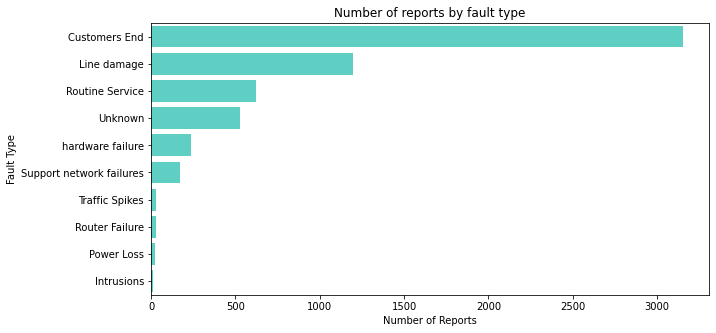

In [328]:
#reports by fault type

fault_type_count = structured_data['Fault Type'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=fault_type_count.index, x= fault_type_count.values, color= '#4CE0D2')
plt.title('Number of reports by fault type')
plt.ylabel('Fault Type')
plt.xlabel('Number of Reports')
plt.show()

The Fault type with the highest number of reports is "Customers End" while the Fault type with the lowest number of reports is "Intrusions"



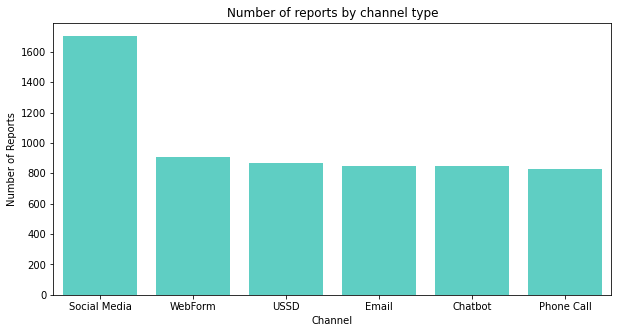

In [329]:
#reports by channel

channel_count = structured_data['Channel'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=channel_count.index, y= channel_count.values, color= '#4CE0D2')
plt.title('Number of reports by channel type')
plt.xlabel('Channel')
plt.ylabel('Number of Reports')
plt.show()

Social Media has the highest Number of Reports while Phone calls has the lowest number of reports

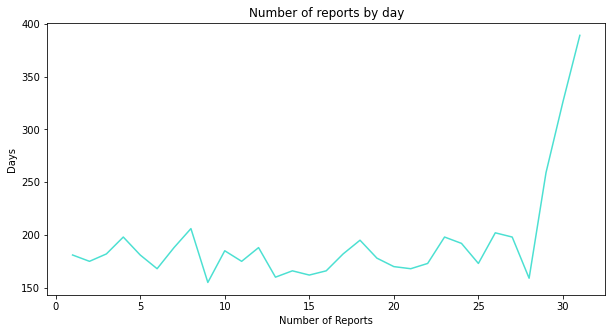

In [330]:
#number of reports by day

Daily_report = (pd.to_datetime(structured_data['Ticket Open Time']).dt.day).value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x = Daily_report.index, y= Daily_report.values, color = '#4CE0D2')
plt.title('Number of reports by day')
plt.xlabel('Number of Reports')
plt.ylabel('Days')
plt.show()

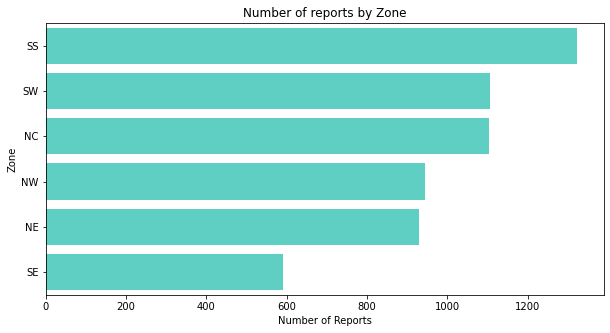

In [375]:
#number of reports by zone
zone_count = structured_data['Zone'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=zone_count.index, x= zone_count.values, color= '#4CE0D2')
plt.title('Number of reports by Zone')
plt.ylabel('Zone')
plt.xlabel('Number of Reports')
plt.show()

Number of reports in the South-South is the highest while the number of reports in the South-East is the lowest

# Question 2

One of the top executives is of the opinion we should optimize TAT(Turn Around Time)
between 6 pm to 9 pm every day due to backlash from disgruntled customers. Do you
agree?
Show us the data to support your position.

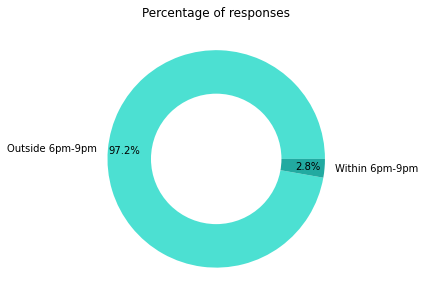

In [344]:
#what is the percentage of reponse that falls between 6pm - 9pm

time_count = structured_data['Within or Outside 6pm-9pm'].value_counts()
labels = time_count.index
values = time_count.values

plt.figure(figsize=(10,5))
plt.pie(values, labels=labels,autopct='%1.1f%%', pctdistance=0.85, colors = ['#4CE0D2', '#22AAA1'])
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of responses')
plt.show()

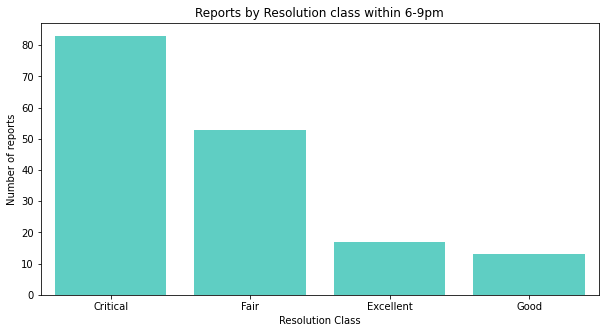

In [333]:
#what are the resolution classes of reports that fall within 6-9pm

within = structured_data[structured_data['Within or Outside 6pm-9pm']=='Within 6pm-9pm']
TAT = within['Resolution Class'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y= TAT.values, x=TAT.index, color='#4CE0D2')
plt.ylabel('Number of reports')
plt.xlabel('Resolution Class')
plt.title('Reports by Resolution class within 6-9pm')
plt.show()

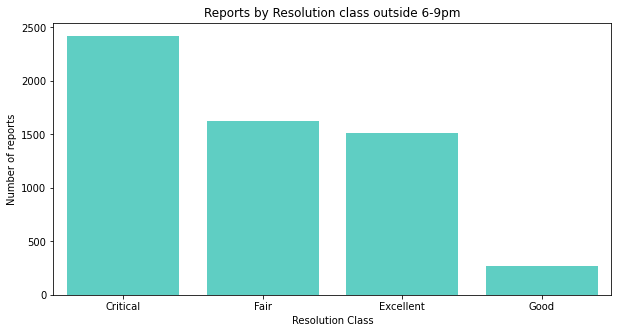

In [334]:
#what are the resolution classes of reports that fall outside 6-9pm

outside = structured_data[structured_data['Within or Outside 6pm-9pm']=='Outside 6pm-9pm']
TAT = outside['Resolution Class'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y= TAT.values, x=TAT.index, color='#4CE0D2')
plt.ylabel('Number of reports')
plt.xlabel('Resolution Class')
plt.title('Reports by Resolution class outside 6-9pm')
plt.show()

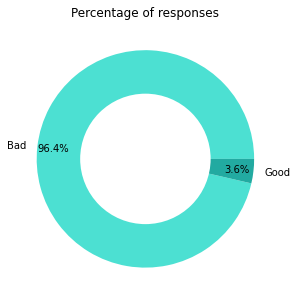

In [343]:
#what is the percentage of bad and good responses for issues within 6-9pm

within = structured_data[structured_data['Within or Outside 6pm-9pm']=='Within 6pm-9pm']

responses = within['Response_time_status'].value_counts()
value = responses.values
label = responses.index

plt.figure(figsize=(10,5))
plt.pie(value, labels=label, autopct='%1.1f%%', colors = ['#4CE0D2', '#22AAA1'], pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of responses')
plt.show()

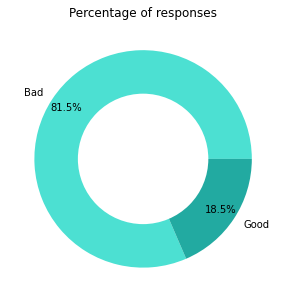

In [345]:
#what is the percentage of bad and good responses for issues outside 6-9pm

outside = structured_data[structured_data['Within or Outside 6pm-9pm']=='Outside 6pm-9pm']

responses = outside['Response_time_status'].value_counts()
value = responses.values
label = responses.index

plt.figure(figsize=(10,5))
plt.pie(value, labels=label, autopct='%1.1f%%', colors = ['#4CE0D2', '#22AAA1'], pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of responses')
plt.show()

# Question 3

Based on SLA, issues are meant to be responded to within 10 seconds after they are
raised.
What are the key factors leading to a delay in ticket response time?
Hint: Show how the different variables affect the ticket response time.

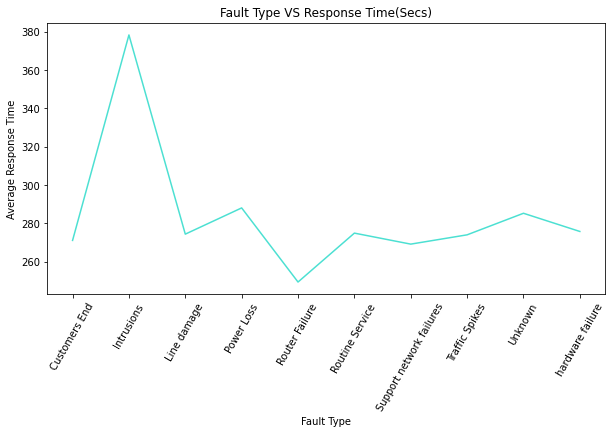

In [360]:
#check the relationship between average response time and fault type

AverageTime= structured_data.groupby('Fault Type')['Response time diff secs'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=AverageTime.index, y=AverageTime.values, color= '#4CE0D2')
plt.xticks(rotation=60)
plt.title('Fault Type VS Response Time(Secs)')
plt.xlabel('Fault Type')
plt.ylabel('Average Response Time')
plt.show()

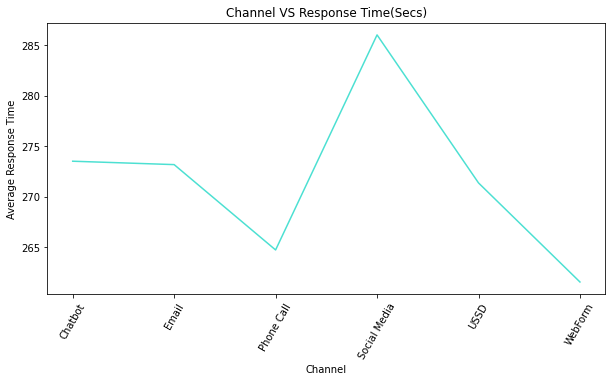

In [361]:
#check the relationship between average response and channel type

AverageTime= structured_data.groupby('Channel')['Response time diff secs'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=AverageTime.index, y=AverageTime.values, color= '#4CE0D2')
plt.xticks(rotation=60)
plt.title('Channel VS Response Time(Secs)')
plt.xlabel('Channel')
plt.ylabel('Average Response Time')
plt.show()

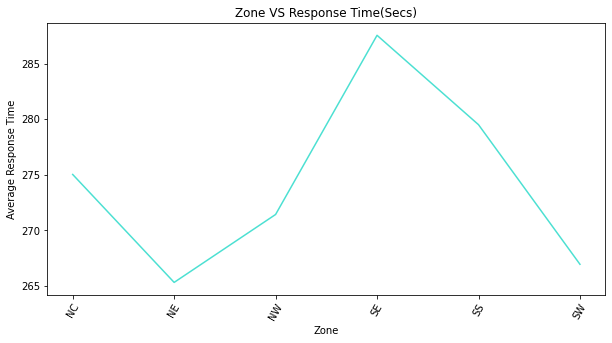

In [362]:
#check the relationship between Zones and Average Response time 

AverageTime= structured_data.groupby('Zone')['Response time diff secs'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=AverageTime.index, y=AverageTime.values, color= '#4CE0D2')
plt.xticks(rotation=60)
plt.title('Zone VS Response Time(Secs)')
plt.xlabel('Zone')
plt.ylabel('Average Response Time')
plt.show()

# Question 4

Which Managers and operators are performing well and which are struggling to meet up
with the required resolution Time?
Make recommendations as to how they can improve

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\1344287205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Critical or Non-Critical'] = np.where(data['Resolution Class']=='Critical', 'Critical', 'Non-Critical')


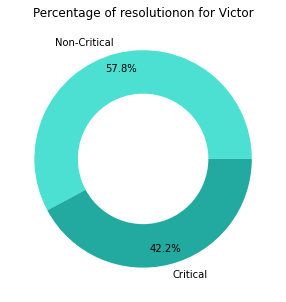

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\1344287205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Critical or Non-Critical'] = np.where(data['Resolution Class']=='Critical', 'Critical', 'Non-Critical')


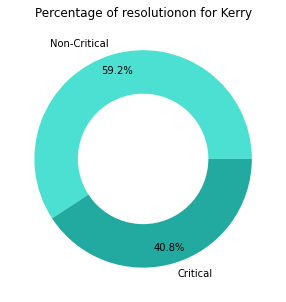

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\1344287205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Critical or Non-Critical'] = np.where(data['Resolution Class']=='Critical', 'Critical', 'Non-Critical')


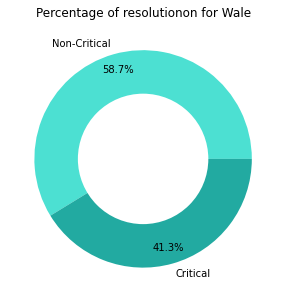

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\1344287205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Critical or Non-Critical'] = np.where(data['Resolution Class']=='Critical', 'Critical', 'Non-Critical')


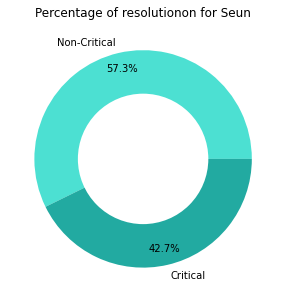

In [387]:
#check the percentage of critical and non critical resolution time per managers

for manager in structured_data['Manager'].unique():
    data = structured_data[structured_data['Manager']==manager]
    data['Critical or Non-Critical'] = np.where(data['Resolution Class']=='Critical', 'Critical', 'Non-Critical')
    resolution= data['Critical or Non-Critical'].value_counts()
    value = resolution.values
    label = resolution.index
    plt.figure(figsize=(10,5))
    plt.pie(value, labels=label, autopct='%1.1f%%', colors = ['#4CE0D2', '#22AAA1'], pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('Percentage of resolutionon for ' + manager)
    plt.show()

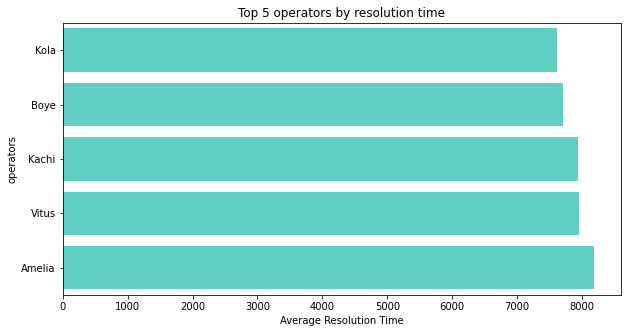

In [393]:
#Top 5 operators by average resolution time 

operator_time = structured_data.groupby('Operator')['Resolution time diff secs'].mean().sort_values()

time_values = operator_time.values[:5]
operators = operator_time.index[:5]
plt.figure(figsize=(10,5))
sns.barplot(y=operators, x= time_values, color= '#4CE0D2')
plt.title('Top 5 operators by resolution time')
plt.ylabel('operators')
plt.xlabel('Average Resolution Time')
plt.show()

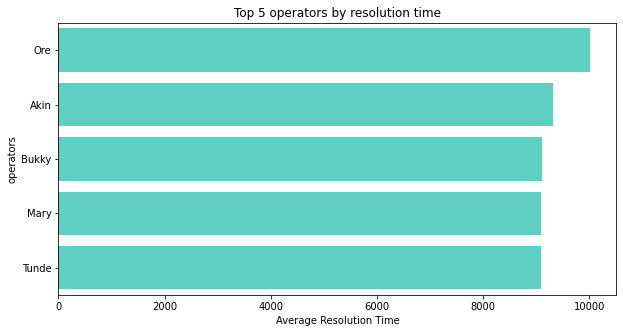

In [396]:
#bottom 5 operators by average resolution time

operator_time = structured_data.groupby('Operator')['Resolution time diff secs'].mean().sort_values(ascending = False)

time_values = operator_time.values[:5]
operators = operator_time.index[:5]
plt.figure(figsize=(10,5))
sns.barplot(y=operators, x= time_values, color= '#4CE0D2')
plt.title('Top 5 operators by resolution time')
plt.ylabel('operators')
plt.xlabel('Average Resolution Time')
plt.show()